In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Fetching Weather Data
API_KEY = '3feca6bf43580bfaa2aa7edb85929cf1'
CITY = 'Pune'
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather'

params = {
    'q': CITY,
    'appid': API_KEY,
    'units': 'metric'  # Use 'imperial' for Fahrenheit
}

In [ ]:
response = requests.get(BASE_URL, params=params)
weather_data = response.json()

In [ ]:
# Extract weather details
temperature = weather_data['main']['temp']
humidity = weather_data['main']['humidity']
wind_speed = weather_data['wind']['speed']
precipitation = weather_data.get('rain', {}).get('1h', 0)

In [ ]:
# Storing in DataFrame
data = {
    'temperature': [temperature],
    'humidity': [humidity],
    'wind_speed': [wind_speed],
    'precipitation': [precipitation]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
# Handle missing values
df.fillna(0, inplace=True)

In [ ]:
# Display weather data statistics
average_temperature = df['temperature'].mean()
max_temperature = df['temperature'].max()
min_temperature = df['temperature'].min()

print(f'Avg: {average_temperature}, Max: {max_temperature}, Min: {min_temperature}')

Avg: 29.67, Max: 29.67, Min: 29.67


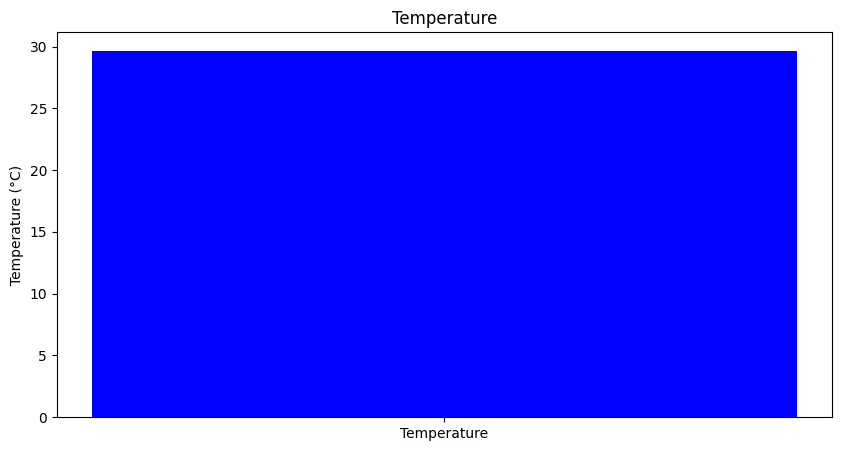

In [ ]:
# Plot temperature data as bar plot
plt.figure(figsize=(10, 5))
plt.bar(['Temperature'], [temperature], color='blue')
plt.title('Temperature')
plt.ylabel('Temperature (°C)')
plt.show()

        date  temperature  humidity  wind_speed  precipitation
0 2024-01-01        29.67        41        1.76           0.00
1 2024-01-02        30.67        39        1.96           0.05
2 2024-01-03        31.67        37        2.16           0.10
3 2024-01-04        32.67        35        2.36           0.15
4 2024-01-05        33.67        33        2.56           0.20
Daily Average Temperature: date
2024-01-01    29.67
2024-01-02    30.67
2024-01-03    31.67
2024-01-04    32.67
2024-01-05    33.67
Name: temperature, dtype: float64


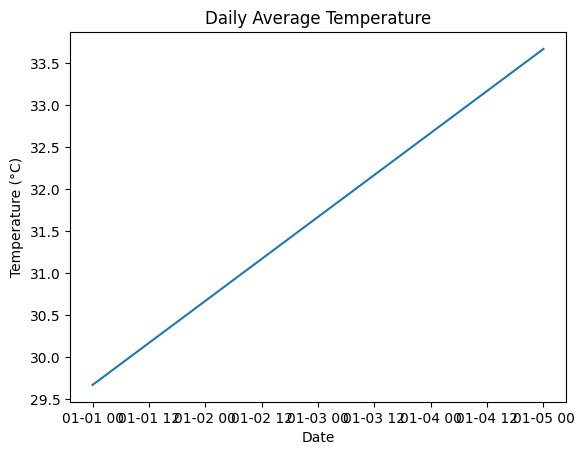

In [ ]:
dates = pd.date_range(start='2024-01-01', periods=5, freq='D')

df_time = pd.DataFrame({
    'date': dates,
    'temperature': [temperature + i for i in range(5)],      # Incremental rise
    'humidity': [humidity - i*2 for i in range(5)],           # Decremental drop
    'wind_speed': [wind_speed + i*0.2 for i in range(5)],     # Small rise
    'precipitation': [precipitation + i*0.05 for i in range(5)]  # Incremental rise
})

print(df_time.head())
# Aggregate by date and calculate average temperature
daily_avg = df_time.groupby(df_time['date'].dt.date).mean()
print("Daily Average Temperature:", daily_avg['temperature'])

# Plot daily average temperature
daily_avg['temperature'].plot(kind='line', title='Daily Average Temperature', xlabel='Date', ylabel='Temperature (°C)')
plt.show()

In [ ]:
if 'coord' in weather_data:
    latitude = weather_data['coord']['lat']
    longitude = weather_data['coord']['lon']
    print(f"Coordinates: Latitude {latitude}, Longitude {longitude}")

    # Using Plotly for a simple map plot
    map_fig = px.scatter_geo(
        lat=[latitude],
        lon=[longitude],
        text=[f"City: {CITY}\nTemperature: {temperature}°C\nHumidity: {humidity}%"],
        title="Weather Location",
    )
    map_fig.update_layout(geo_scope="asia")  # Centers the map around Asia
    map_fig.show()

Coordinates: Latitude 18.5196, Longitude 73.8553


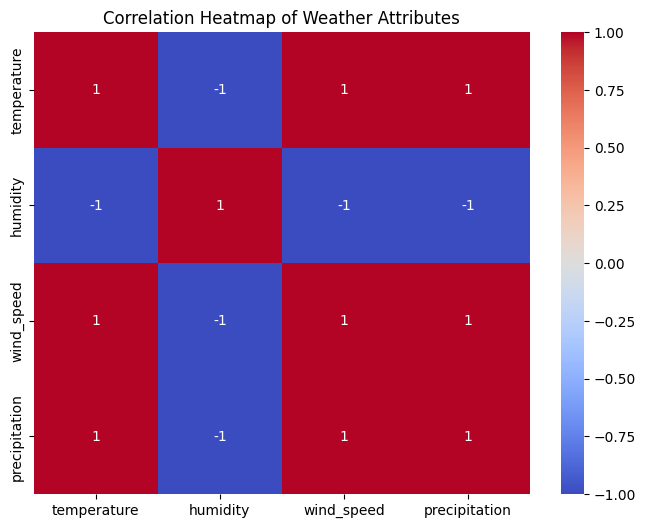

In [ ]:
correlation_matrix = df_time[['temperature', 'humidity', 'wind_speed', 'precipitation']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Weather Attributes")
plt.show()